In [112]:
from typing import TypedDict
from langgraph.graph import StateGraph ,START, END


In [113]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int

In [114]:
def addition_operation(state  :AgentState) -> AgentState:
    """ This node adds two numnbers together and returns the result """
    
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def addition_operation2(state  :AgentState) -> AgentState:
    """ This node adds two numnbers together and returns the result """
    
    state["finalNumber"] = state["number3"] + state["number4"]
    return state

def subtraction_operation(state  :AgentState) -> AgentState:
    """ This node substracts two numnbers together and returns the result """
    
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def subtraction_operation2(state  :AgentState) -> AgentState:
    """ This node substracts two numnbers together and returns the result """
    
    state["finalNumber"] = state["number3"] - state["number4"]
    return state

def decide_next_node(state : AgentState) -> AgentState:
    """ This node decides which node to run next (the conditional node) """
    
    if state["operation"] == "+":
        return "addition_operation"

    elif state["operation"] == "-":
        return "subtraction_operation"
    
def decide_next_node2(state : AgentState) -> AgentState:
    """ This node decides which node to run next (the conditional node) """
    
    if state["operation2"] == "+":
        return "addition_operation2"

    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [115]:
graph = StateGraph(AgentState)

graph.add_node("addition_operation", addition_operation)
graph.add_node("subtraction_operation", subtraction_operation)
graph.add_node("addition_operation2" , addition_operation2)
graph.add_node("subtraction_operation2" , subtraction_operation2)
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)

In [116]:
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation" : "addition_operation",
        "subtraction_operation" : "subtraction_operation"
    }
)

graph.add_edge("addition_operation", "router2")
graph.add_edge("subtraction_operation", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2" : "addition_operation2",
        "subtraction_operation2" : "subtraction_operation2"
    }
)

graph.add_edge("addition_operation2",END)
graph.add_edge("subtraction_operation2",END)

app = graph.compile()

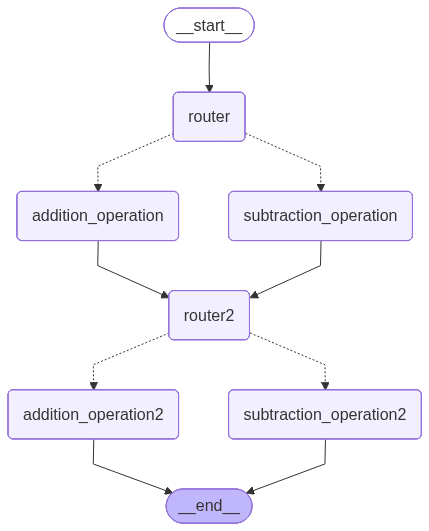

In [117]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [118]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2=4 , number3=7 , number4=1, operation2="+")
print(app.invoke(initial_state_1))


{'number1': 10, 'number2': 4, 'number3': 7, 'number4': 1, 'operation': '-', 'operation2': '+', 'finalNumber': 8}
